<a href="https://colab.research.google.com/github/Jatin1895470/Deep-Learning-Assignment1/blob/main/Cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
import pandas as pd


tf.random.set_seed(123)
np.random.seed(123)

# Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Splitting the data into training, validation, and testing sets
x_val, y_val = x_train[-5000:], y_train[-5000:]
x_train, y_train = x_train[:-5000], y_train[:-5000]

# Defining class names for CIFAR-10
class_names = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

# Model 1 (Custom Cnn)
model1 = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model1.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])


history1 = model1.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_val, y_val))

# Model 2: LeNet-5
model2 = keras.Sequential([
    keras.layers.Conv2D(6, (5, 5), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(16, (5, 5), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(120, activation='relu'),
    keras.layers.Dense(84, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model2.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

history2 = model2.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_val, y_val))

# Model 3: Simplified ResNet


def build_resnet(input_shape, num_classes, num_filters=16, num_blocks=[2, 2, 2]):
    inputs = Input(shape=input_shape)
    x = Conv2D(num_filters, (3, 3), padding='same')(inputs)

    for block in range(len(num_blocks)):
        for layer in range(num_blocks[block]):
            strides = 1
            if block > 0 and layer == 0:
                strides = 2
            y = Conv2D(num_filters, (3, 3), padding='same', strides=strides)(x)
            y = BatchNormalization()(y)
            y = Activation('relu')(y)
            y = Conv2D(num_filters, (3, 3), padding='same')(y)
            y = BatchNormalization()(y)
            if layer == 0 and block > 0:
                x = Conv2D(num_filters, (1, 1), padding='valid', strides=strides)(x)
            x = keras.layers.add([x, y])
            x = Activation('relu')(x)
        num_filters *= 2

    x = GlobalAveragePooling2D()(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    return Model(inputs, outputs)

model3 = build_resnet(input_shape=(32, 32, 3), num_classes=10)
model3.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])


history3 = model3.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_val, y_val))



170498071/170498071 [==============================] - 2s 0us/step
Epoch 1/20
704/704 [==============================] - 20s 6ms/step - loss: 1.6417 - accuracy: 0.3981 - val_loss: 1.4033 - val_accuracy: 0.5002
Epoch 2/20
704/704 [==============================] - 3s 5ms/step - loss: 1.2732 - accuracy: 0.5442 - val_loss: 1.1773 - val_accuracy: 0.5742
Epoch 3/20
704/704 [==============================] - 4s 6ms/step - loss: 1.1053 - accuracy: 0.6113 - val_loss: 1.0670 - val_accuracy: 0.6258
Epoch 4/20
704/704 [==============================] - 3s 5ms/step - loss: 1.0012 - accuracy: 0.6490 - val_loss: 0.9927 - val_accuracy: 0.6558
Epoch 5/20
704/704 [==============================] - 3s 5ms/step - loss: 0.9253 - accuracy: 0.6763 - val_loss: 0.9351 - val_accuracy: 0.6702
Epoch 6/20
704/704 [==============================] - 4s 6ms/step - loss: 0.8715 - accuracy: 0.6950 - val_loss: 0.9182 - val_accuracy: 0.6848
Epoch 7/20
704/704 [==============================] - 4s 5ms/step - loss: 0.8148

313/313 [==============================] - 2s 5ms/step - loss: 0.9418 - accuracy: 0.7772


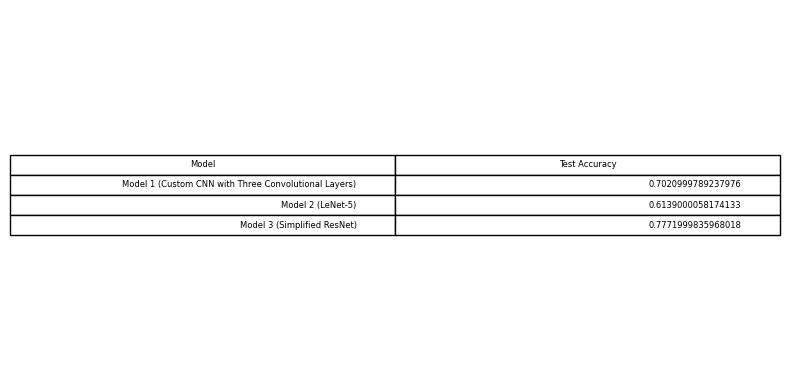

In [ ]:
# Table
models = ['Model 1 (Custom CNN with Three Convolutional Layers)', 'Model 2 (LeNet-5)', 'Model 3 (Simplified ResNet)']
test_accuracies = [model1.evaluate(x_test, y_test)[1], model2.evaluate(x_test, y_test)[1], model3.evaluate(x_test, y_test)[1]]

results = pd.DataFrame({'Model': models, 'Test Accuracy': test_accuracies})


plt.figure(figsize=(8, 4))
ax = plt.gca()
ax.axis('off')
plt.table(cellText=results.values, colLabels=results.columns, loc='center')
plt.tight_layout()
plt.savefig('model_comparison.png')

In [ ]:
#Model 1 upgradation
# Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Data Augmentation
data_augmentation = keras.Sequential(
    [
        keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
        keras.layers.experimental.preprocessing.RandomRotation(0.1),
    ]
)

# Creating a deeper CNN model
model1 = keras.Sequential([
    data_augmentation,  # Apply data augmentation
    keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.GlobalAveragePooling2D(),

    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model1.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])


history1 = model1.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.1)

# Evaluating the model on the test set
test_loss, test_acc = model1.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")


Epoch 1/20
704/704 [==============================] - 18s 19ms/step - loss: 1.3730 - accuracy: 0.5032 - val_loss: 1.4468 - val_accuracy: 0.5148
Epoch 2/20
704/704 [==============================] - 13s 18ms/step - loss: 0.9902 - accuracy: 0.6506 - val_loss: 1.1838 - val_accuracy: 0.6354
Epoch 3/20
704/704 [==============================] - 12s 18ms/step - loss: 0.8087 - accuracy: 0.7166 - val_loss: 0.9265 - val_accuracy: 0.6848
Epoch 4/20
704/704 [==============================] - 13s 18ms/step - loss: 0.7038 - accuracy: 0.7577 - val_loss: 0.8749 - val_accuracy: 0.7226
Epoch 5/20
704/704 [==============================] - 12s 18ms/step - loss: 0.6312 - accuracy: 0.7812 - val_loss: 0.6189 - val_accuracy: 0.7912
Epoch 6/20
704/704 [==============================] - 12s 18ms/step - loss: 0.5636 - accuracy: 0.8036 - val_loss: 0.8474 - val_accuracy: 0.7282
Epoch 7/20
704/704 [==============================] - 12s 18ms/step - loss: 0.5212 - accuracy: 0.8192 - val_loss: 0.5681 - val_accuracy:

1/1 [==============================] - 0s 382ms/step


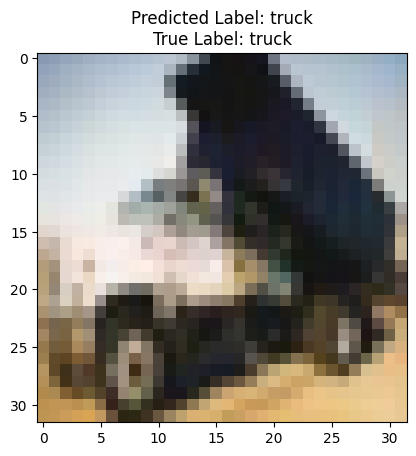

1/1 [==============================] - 0s 21ms/step


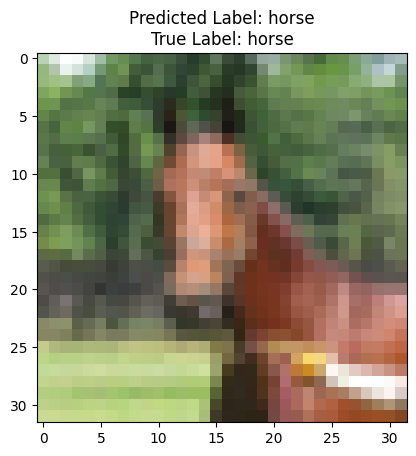

1/1 [==============================] - 0s 19ms/step


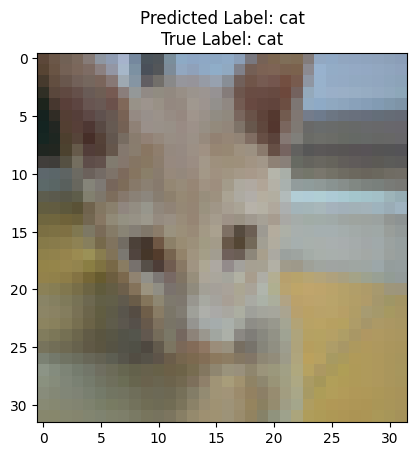

1/1 [==============================] - 0s 21ms/step


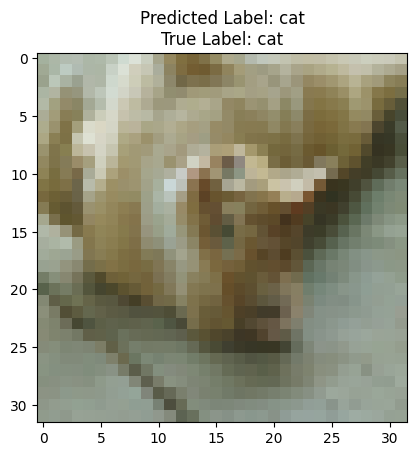

1/1 [==============================] - 0s 19ms/step


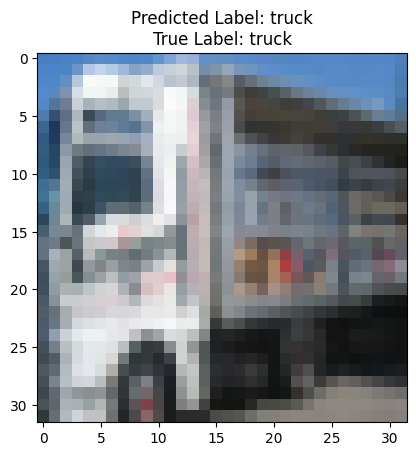

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to display test images and their predictions with class names
def display_test_predictions(model, class_names, num_samples=5):
    sample_indices = np.random.choice(len(x_test), num_samples, replace=False)

    for index in sample_indices:
        test_image = x_test[index]
        true_label = y_test[index]

        # Model prediction
        predicted_label = model.predict(np.expand_dims(test_image, axis=0))
        predicted_class = np.argmax(predicted_label)

        # Display the test image with class names and predictions
        plt.figure()
        plt.imshow(test_image)
        plt.title(f"Predicted Label: {class_names[predicted_class]}\nTrue Label: {class_names[np.argmax(true_label)]}")
        plt.show()

# Call the function to display predictions
display_test_predictions(model1, class_names, num_samples=5)

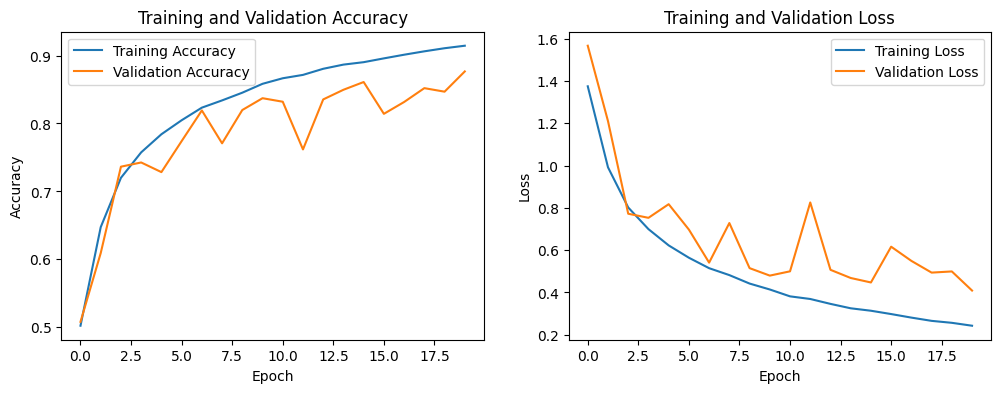

In [ ]:
import matplotlib.pyplot as plt

# Training and Validation Curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()